<a href="https://colab.research.google.com/github/YeoYongSheng/ETLShopee_MenShoes/blob/main/ETL_Shopee_Men_Shoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GROUP 5 MEMBERS 
1. YEO YONG SHENG A175749
2. LOW YEE CHI A176085
3. CHOO ZHE LIM A175601
4. TAN JING XUAN A175711

# Import Libraries

In [3]:
#import neccessary package
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import *
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('disable-notifications')
chrome_options.add_argument('--disable-infobars')
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)



     |████████████████████████████████| 958 kB 4.3 MB/s 
     |████████████████████████████████| 356 kB 69.8 MB/s 
     |████████████████████████████████| 138 kB 68.8 MB/s 
     |████████████████████████████████| 3.6 MB 57.4 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 58 kB 4.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.down

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: use options instead of chrome_options


# Extract

## Scrap for men shoes available in the board of popular of shopee mall (links) 

In [ ]:
delay=100
links =[]
#scrap the link from the search mainpage 1-3


for c in range(1,4):
  try:
    url="https://shopee.com.my/mall/Men-Shoes-cat.11000781/popular?pageNumber={}".format(c)
    driver.get(url)
    #set own pause time
    scroll_pause_time = 0.5 
    # get the screen height of the web
    screen_height = driver.execute_script("return window.screen.height;")   
    i = 0.01
    
    while True:
      # scroll one screen height each time
      driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
      i += 1
      time.sleep(scroll_pause_time)
      # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
      scroll_height = driver.execute_script("return document.body.scrollHeight;")  
      # Break the loop when the height we need to scroll to is larger than the total scroll height
      if (screen_height) * i > scroll_height:
          break 

    while True:
        try:
            WebDriverWait(driver, delay)
            print ("Page {} is ready".format(url))
            
            sleep(10)
            html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
            #print(html)
            soup = BeautifulSoup(html, "html.parser")
          
            for items in soup.find_all('div', class_='col-xs-2 recommend-products-by-view__item-card-wrapper'):
              try:
                bk_lnk=items.a.get("href")
                baseurl="https://shopee.com.my"
                complete= baseurl+bk_lnk
                links.append(complete)
            

              except AttributeError:
                pass

            print ("Page {} is done".format(url))
            break 
        except TimeoutException:
            print ("Loading took too much time!-Try again")
  except:
    driver.close()
    

Page https://shopee.com.my/mall/Men-Shoes-cat.11000781/popular?pageNumber=1 is ready
Page https://shopee.com.my/mall/Men-Shoes-cat.11000781/popular?pageNumber=1 is done
Page https://shopee.com.my/mall/Men-Shoes-cat.11000781/popular?pageNumber=2 is ready
Page https://shopee.com.my/mall/Men-Shoes-cat.11000781/popular?pageNumber=2 is done
Page https://shopee.com.my/mall/Men-Shoes-cat.11000781/popular?pageNumber=3 is ready
Page https://shopee.com.my/mall/Men-Shoes-cat.11000781/popular?pageNumber=3 is done


## Scrap for the men shoes' details(attributes)

In [ ]:
#get the total number of products sold from the link scrapped to get the top 10 best selling men shoes
item_sold=[]
item_name=[]
item_price=[]
item_rating=[]
seller_name=[]
seller_details=[]
pagenumber=1
for i in links:   
  driver.get(i)


  while True:
      try:
          WebDriverWait(driver, delay)
          print ("Page {} is ready".format(pagenumber))
          sleep(5)
          html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
          soup = BeautifulSoup(html, "html.parser")

          # find the total sold of items
          for item_c in soup.find_all('div', class_='_3b2Btx'):
              item_sold.append(item_c.text)

          # find product name
          for item_n in soup.find_all('div', class_ = '_3g8My-'):
              item_name.append(item_n.text)
         
          # find product price
          for item_p in soup.find_all('div', class_ = '_2v0Hgx'):
              item_price.append(item_p.text)
          
           # find product rating
          for items_r in soup.find_all('div',class_ = '_3uBhVI'):
              item_rating.append(items_r.text)

          
           # find the seller name
          for item_c in soup.find_all('div', class_='_1wVLAc'):
              seller_name.append(item_c.text)
          
           # find seller's detail
          for seller_d in soup.find_all('span', class_='_33OqNH'):
              seller_details.append(seller_d.text)

          print ("Page {} is done".format(pagenumber))
          pagenumber+=1
          break
      except TimeoutException:
          print ("Loading took too much time!-Try again")

Page 1 is ready
Page 1 is done
Page 2 is ready
Page 2 is done
Page 3 is ready
Page 3 is done
Page 4 is ready
Page 4 is done
Page 5 is ready
Page 5 is done
Page 6 is ready
Page 6 is done
Page 7 is ready
Page 7 is done
Page 8 is ready
Page 8 is done
Page 9 is ready
Page 9 is done
Page 10 is ready
Page 10 is done
Page 11 is ready
Page 11 is done
Page 12 is ready
Page 12 is done
Page 13 is ready
Page 13 is done
Page 14 is ready
Page 14 is done
Page 15 is ready
Page 15 is done
Page 16 is ready
Page 16 is done
Page 17 is ready
Page 17 is done
Page 18 is ready
Page 18 is done
Page 19 is ready
Page 19 is done
Page 20 is ready
Page 20 is done
Page 21 is ready
Page 21 is done
Page 22 is ready
Page 22 is done
Page 23 is ready
Page 23 is done
Page 24 is ready
Page 24 is done
Page 25 is ready
Page 25 is done
Page 26 is ready
Page 26 is done
Page 27 is ready
Page 27 is done
Page 28 is ready
Page 28 is done
Page 29 is ready
Page 29 is done
Page 30 is ready
Page 30 is done
Page 31 is ready
Page 31 is 

## Seperate the data scrapped as individual list

In [4]:
#get the data of product's rating
item_rated= item_rating[::2]
print(item_rated)

#get the data of product rater
item_commentor= item_rating[1::2]
print(item_commentor)

#get the data of seller's rating
seller_rating = seller_details[::6]
print(seller_rating)

#get the data of seller's response rate
seller_responserate = seller_details[2::6]
print(seller_responserate)

#get the data of seller's joined duration
seller_joined = seller_details[4::6]
print(seller_joined)

#get the data of seller's follower
seller_follower = seller_details[5::6]
print(seller_follower)


['4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '5.0', '4.9', '4.8', '4.9', '5.0', '5.0', '5.0', '4.8', '5.0', '4.9', '5.0', '4.9', '5.0', '4.8', '5.0', '4.9', '4.9', '4.9', '4.8', '5.0', '4.9', '5.0', '4.9', '4.9', '4.9', '5.0', '5.0', '4.9', '4.9', '4.9', '4.9', '5.0', '4.9', '4.8', '5.0', '4.9', '4.9', '4.9', '5.0', '5.0', '4.8', '4.9', '4.9', '4.9', '4.9', '5.0', '5.0', '4.9', '5.0', '5.0', '4.9', '4.9', '4.9', '4.9', '5.0', '4.9', '4.9', '4.9', '4.9', '4.9', '5.0', '5.0', '4.9', '4.9', '5.0', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '5.0', '4.9', '5.0', '4.9', '5.0', '5.0', '4.9', '4.9', '5.0', '4.9', '5.0', '5.0', '5.0', '4.9', '4.9', '5.0', '4.9', '4.9', '4.9', '4.9', '4.9', '5.0', '4.9', '5.0', '5.0', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '5.0', '5.0', '4.8', '5.0', '4.9', '5.0', '5.0', '5.0', '5.0', '4.9', '4.8', '4.9', '4.9', '4.9', '4.9', '5.0', '4.9', '4.9', '5.0', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '5.0', '4.9'

## Save all the attributes into dataframe

In [5]:
#store the details scrapped into dataframe

pd.set_option('display.max_rows', None)
df = pd.DataFrame({'Links':links, 'Product Name':item_name, 'Total Product Sold':item_sold, 'Product Price':item_price,
                   'Product Rating':item_rated,'Product Rater Quantity':item_commentor,'Seller Name':seller_name,'Seller Response Rate':seller_responserate, 
                   'Seller Overall Rater Quantity':seller_rating,'Seller Joined Duration':seller_joined, 'Seller Number of Follower':seller_follower})
df.head()

,Links,Product Name,Total Product Sold,Product Price,Product Rating,Product Rater Quantity,Seller Name,Seller Response Rate,Seller Overall Rater Quantity,Seller Joined Duration,Seller Number of Follower
0,https://shopee.com.my/DR.-Maldini-R-TS38S-Wate...,DR. Maldini R TS38S Water Boots,740,RM19.98 - RM21.00,4.9,425,azerconcept.os,100%,6.1k,31 months ago,1.6k
1,https://shopee.com.my/Puma-Men-Popcat-20-Bold-...,Puma Men Popcat 20 Bold Sandal Slide Shoe Kasu...,626,RM58.40 - RM59.90,4.9,411,sportplanet.os,79%,93.5k,4 years ago,173.7k
2,https://shopee.com.my/Fipper-Slip-On-Non-Rubbe...,Fipper Slip On Non-Rubber for Unisex in Black ...,1.4k,RM49.41,4.9,910,fipperhq,88%,116.3k,4 years ago,192.7k
3,https://shopee.com.my/Levi's-June-Slides-Men-3...,Levi's June Slides Men 37544-0024,296,RM62.00,4.9,208,levimy.os,94%,69k,5 years ago,309.8k
4,https://shopee.com.my/Fipper-Slipper-Slip-On-S...,Fipper Slipper Slip On Series For Men & Women,5.6k,RM43.90,4.9,3.5k,fipperhq,92%,253k,5 years ago,148.7k


# Transformation

## Data Cleaning

In [ ]:
#get the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Links                          180 non-null    object
 1   Product Name                   180 non-null    object
 2   Total Product Sold             180 non-null    object
 3   Product Price                  180 non-null    object
 4   Product Rating                 180 non-null    object
 5   Product Rater Quantity         180 non-null    object
 6   Seller Name                    180 non-null    object
 7   Seller Response Rate           180 non-null    object
 8   Seller Overall Rater Quantity  180 non-null    object
 9   Seller Joined Duration         180 non-null    object
 10  Seller Number of Follower      180 non-null    object
dtypes: object(11)
memory usage: 15.6+ KB


In [6]:
#basic data cleaning function
def preprocessPrice(x):
  price = re.sub(r'[RM]', '', x).strip()
  if('-' in price):
    return sum([float(p) for p in price.split('-')])/2
  else:
    return float(price)

def value_to_int(x):
  if('k' in x and '.' in x):
    idxOfPeriod = x.index('.')
    return int(x[:idxOfPeriod] + x[idxOfPeriod+1] + '00')
  elif('k' in x):
    return int(x[:len(x)-1] + '000')
  else:
    return int(x)

def extractNumber(x):
  return re.sub(r'[^0-9]','',x).strip()

def preprocessDuration(x):
  if('months ago' in x):
    duration = int(re.sub(r'[months ago]', '', x).strip())
    return (duration*30)
  elif('years ago' in x):
    duration = int(re.sub(r'[years ago]', '', x).strip())
    return (duration*12*30)
  elif('days ago' in x):
    duration = int(re.sub(r'[days ago]', '', x).strip())
    return duration
  elif('day ago' in x):
    duration = int(re.sub(r'[day ago]', '', x).strip())
    return duration

In [7]:
#data cleaning of totalproductsold and sort it in descending order
df['Total Product Sold'] = df['Total Product Sold'].apply(value_to_int)
df['Product Price'] = df['Product Price'].apply(preprocessPrice)
df['Product Price'] = df['Product Price'].round(2)
df['Product Rater Quantity'] = df['Product Rater Quantity'].apply(value_to_int)
df['Product Rating'] = df['Product Rating'].astype(float)
df['Seller Overall Rater Quantity'] = df['Seller Overall Rater Quantity'].apply(value_to_int)
df['Seller Response Rate'] = df['Seller Response Rate'].apply(extractNumber).astype(int)
df['Seller Joined Duration'] = df['Seller Joined Duration'].apply(preprocessDuration)
df['Seller Number of Follower'] = df['Seller Number of Follower'].apply(value_to_int)
df=df.sort_values("Total Product Sold",ascending=False,ignore_index=True)
df.head()

,Links,Product Name,Total Product Sold,Product Price,Product Rating,Product Rater Quantity,Seller Name,Seller Response Rate,Seller Overall Rater Quantity,Seller Joined Duration,Seller Number of Follower
0,https://shopee.com.my/Fipper-Slipper-Basic-M-R...,Fipper Slipper Basic M Rubber for Men in Black,8400,16.07,4.9,4700,fipperhq,88,116300,1440,192700
1,https://shopee.com.my/DC-Home-Men-Comfort-Sand...,DC Home Men Comfort Sandals DH-HO-3000,7800,39.00,4.9,4000,drcardin.os,81,13100,1800,30000
2,https://shopee.com.my/Fipper-Slipper-Slip-On-S...,Fipper Slipper Slip On Series For Men & Women,5600,43.90,4.9,3500,fipperhq,92,253000,1800,148700
3,https://shopee.com.my/asadi-Unisex-Sandal-MJA1...,asadi Unisex Sandal [MJA1266],5300,14.00,4.9,2500,asadi_malaysia,88,116300,1440,192700
4,https://shopee.com.my/Adda-52201-Sandal-Lelaki...,Adda 52201 Sandal Lelaki Men Sandals Flip Flops,5000,14.60,4.9,2700,monobomalaysia,92,253000,1800,148700


In [ ]:
a=df['Total Product Sold'].unique()
b=df['Product Rating'].unique()
c=df['Product Rater Quantity'].unique()
d=df['Seller Response Rate'].unique()
e=df['Seller Overall Rater Quantity'].unique()
f=df['Seller Joined Duration'].unique()
g=df['Seller Number of Follower'].unique()
df.info()

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Links                          180 non-null    object 
 1   Product Name                   180 non-null    object 
 2   Total Product Sold             180 non-null    int64  
 3   Product Price                  180 non-null    float64
 4   Product Rating                 180 non-null    float64
 5   Product Rater Quantity         180 non-null    int64  
 6   Seller Name                    180 non-null    object 
 7   Seller Response Rate           180 non-null    int64  
 8   Seller Overall Rater Quantity  180 non-null    int64  
 9   Seller Joined Duration         180 non-null    int64  
 10  Seller Number of Follower      180 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 15.6+ KB
[8400 7800 5600 5300 5000 4700 3900 3800 3700 3600 3

## Identify Outlier of Every Attribute using Boxplot 

### Boxplot of **Total Product Sold**

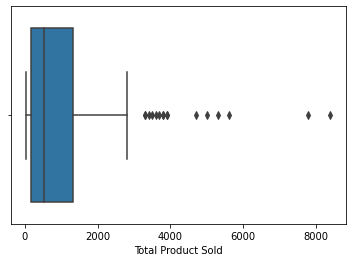

In [ ]:
#data visualization for TotalProductSold before remove outliers
TotalProductSold = df['Total Product Sold']

sns.boxplot(x=TotalProductSold) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('TPS_B.png')

### Boxplot of **Product Price** 

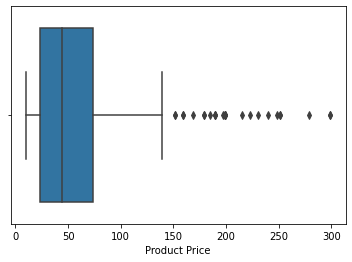

In [ ]:
#data visualization for ProductPrice before remove outliers
ProductPrice = df['Product Price']

sns.boxplot(x=ProductPrice) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('PP_B.png')

### Boxplot of **Product Rating** 

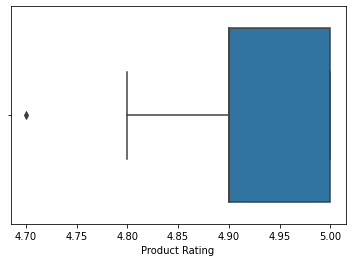

In [ ]:
#data visualization for ProductRating before remove outliers
ProductRating = df['Product Rating']

sns.boxplot(x=ProductRating) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('PR_B.png')

###Boxplot of **Product Rater Quantity** 

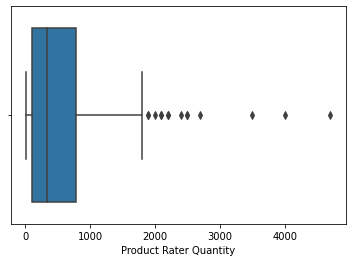

In [ ]:
#data visualization for ProductRaterQuantity before remove outliers
ProductRaterQuantity = df['Product Rater Quantity']

sns.boxplot(x=ProductRaterQuantity) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('PRQ_B.png')

### Boxplot of **Seller Response Rate**

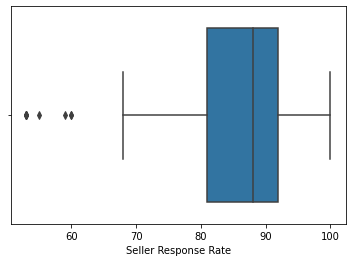

In [ ]:
#data visualization for SellerResponseRate before remove outliers
SellerResponseRate = df['Seller Response Rate']

sns.boxplot(x=SellerResponseRate) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('SRR_B.png')

### Boxplot of **Seller Overall Rater Quantity** 

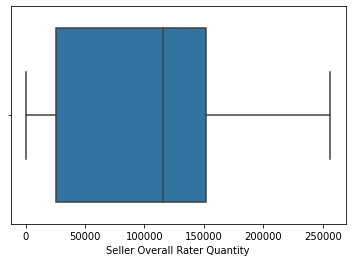

In [ ]:
#data visualization for ProductPrice before remove outliers
SellerOverallRaterQuantity = df['Seller Overall Rater Quantity']

sns.boxplot(x=SellerOverallRaterQuantity) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('SR_B.png')

### Boxplot of **Seller Joined Duration** 

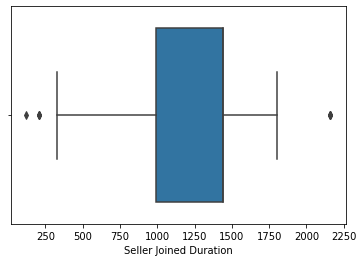

In [ ]:
#data visualization for SellerJoinedPeriod before remove outliers
SellerJoinedDuration = df['Seller Joined Duration']

sns.boxplot(x=SellerJoinedDuration) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('SJP_B.png')

### Boxplot of **Seller Number of Follower** 

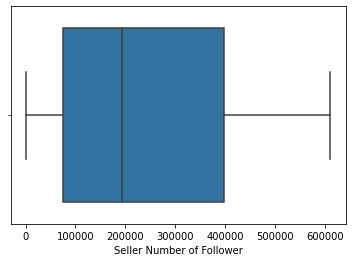

In [ ]:
#data visualization for SellerFollower before remove outliers
SellerNumberofFollower = df['Seller Number of Follower']

sns.boxplot(x=SellerNumberofFollower) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('SF_B.png')

## Handling Outlier(Need to run multiple times until no outlier in data)


In [15]:

for x in ['Total Product Sold']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

for x in ['Seller Response Rate']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    
for x in ['Seller Joined Duration']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

for x in ['Product Rating']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
  
for x in ['Product Rater Quantity']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

for x in ['Product Price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan



In [16]:
df.isnull().sum()

Links                            0
Product Name                     0
Total Product Sold               1
Product Price                    0
Product Rating                   0
Product Rater Quantity           0
Seller Name                      0
Seller Response Rate             0
Seller Overall Rater Quantity    0
Seller Joined Duration           0
Seller Number of Follower        0
dtype: int64

In [17]:
df = df.dropna(axis = 0)
df.isnull().sum()

Links                            0
Product Name                     0
Total Product Sold               0
Product Price                    0
Product Rating                   0
Product Rater Quantity           0
Seller Name                      0
Seller Response Rate             0
Seller Overall Rater Quantity    0
Seller Joined Duration           0
Seller Number of Follower        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 21 to 177
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Links                          115 non-null    object 
 1   Product Name                   115 non-null    object 
 2   Total Product Sold             115 non-null    float64
 3   Product Price                  115 non-null    float64
 4   Product Rating                 115 non-null    float64
 5   Product Rater Quantity         115 non-null    float64
 6   Seller Name                    115 non-null    object 
 7   Seller Response Rate           115 non-null    float64
 8   Seller Overall Rater Quantity  115 non-null    int64  
 9   Seller Joined Duration         115 non-null    float64
 10  Seller Number of Follower      115 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 10.8+ KB


## Get the boxplot after all outliers being removed

### Boxplot of **Total Product Sold**

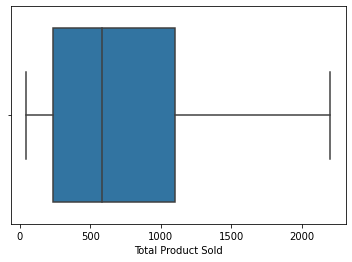

In [19]:
#data visualization for TotalProductSold after remove outliers
TotalProductSold = df['Total Product Sold']

sns.boxplot(x=TotalProductSold) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('TPS_A.png')

### Boxplot of **Product Price** 

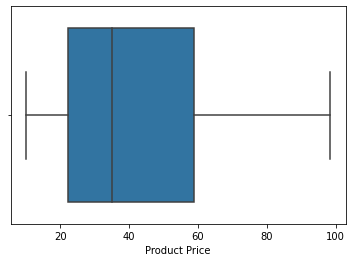

In [ ]:
#data visualization for ProductPrice after remove outliers
ProductPrice = df['Product Price']

sns.boxplot(x=ProductPrice) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('PP_A.png')

### Boxplot of **Product Rating** 

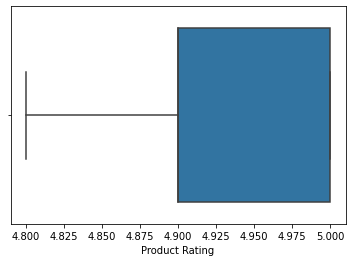

In [ ]:
#data visualization for ProductRating after remove outliers
ProductRating = df['Product Rating']

sns.boxplot(x=ProductRating) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('PR_A.png')

### Boxplot of **Product Rater Quantity** 

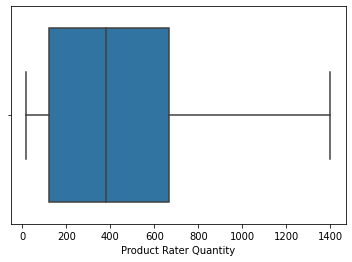

In [ ]:
#data visualization for ProductRaterQuantity after remove outliers
ProductRaterQuantity = df['Product Rater Quantity']

sns.boxplot(x=ProductRaterQuantity) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('PRQ_A.png')

### Boxplot of **Seller Response Rate**

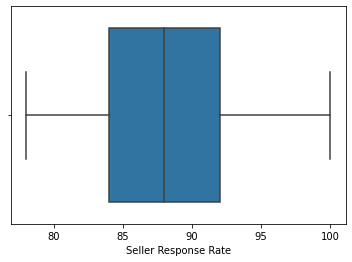

In [ ]:
#data visualization for SellerResponseRate after remove outliers
SellerResponseRate = df['Seller Response Rate']

sns.boxplot(x=SellerResponseRate) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('SRR_A.png')

### Boxplot of **Seller Overall Rater Quantity** 

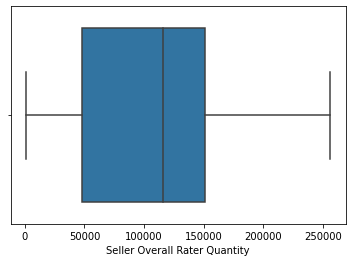

In [82]:
#data visualization for ProductPrice after remove outliers
SellerOverallRaterQuantity = df['Seller Overall Rater Quantity']

sns.boxplot(x=SellerOverallRaterQuantity) #boxplot using seaborn
plt.savefig('SR_A.png')

### Boxplot of **Seller Joined Duration** 

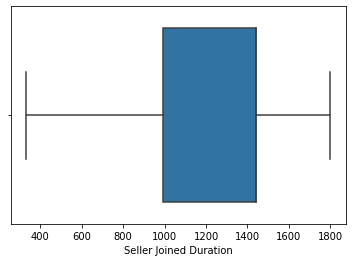

In [ ]:
#data visualization for SellerJoinedPeriod after remove outliers
SellerJoinedDuration = df['Seller Joined Duration']

sns.boxplot(x=SellerJoinedDuration) #boxplot using seaborn

#Save the graph as photo for future usage
plt.savefig('SJP_A.png')

### Boxplot of **Seller Number of Follower** 

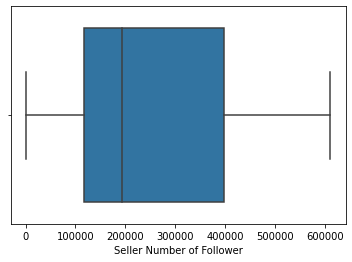

In [83]:
#data visualization for SellerFollower
SellerNumberofFollower = df['Seller Number of Follower']

sns.boxplot(x=SellerNumberofFollower) #boxplot using seaborn

plt.savefig('SF_A.png')

# Load


In [8]:
df.to_csv('ETL_Shopee_Men_Shoes.csv', index=False)

# Data Visualization

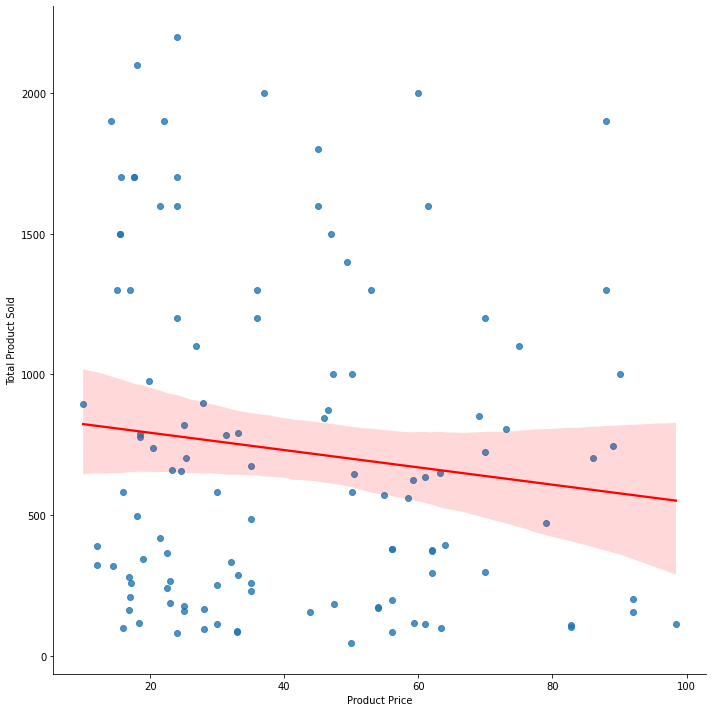

In [112]:
#scatterplot
#Relationship between Product Price and Total Numbers of Product Sold

sns.lmplot(x='Product Price',y='Total Product Sold',data=df,fit_reg=True, height=10,line_kws={'color': 'red'}) 


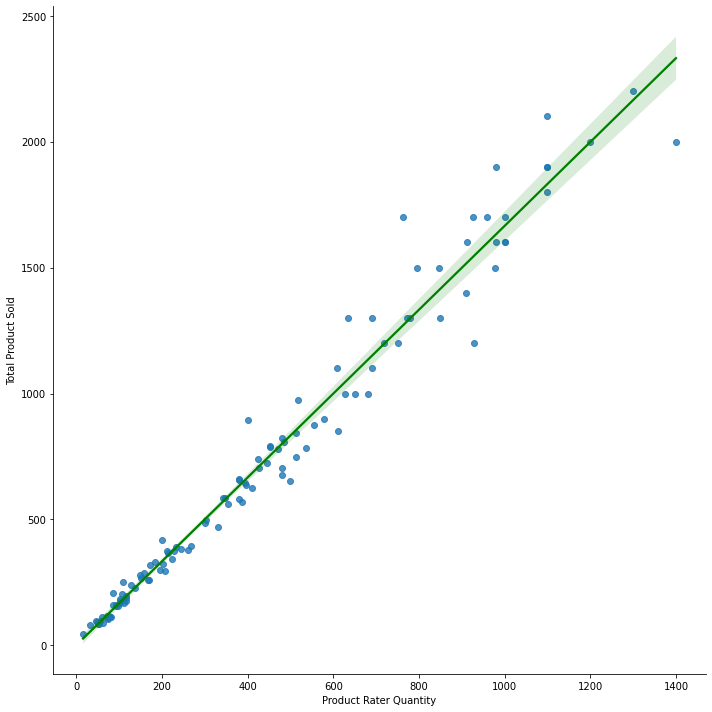

In [114]:
#scatterplot
#Relationship between Product Rater Quantity and Total Product Sold

ax=sns.lmplot(x='Product Rater Quantity',y='Total Product Sold',data=df,fit_reg=True, height=10,line_kws={'color': 'green'}) 


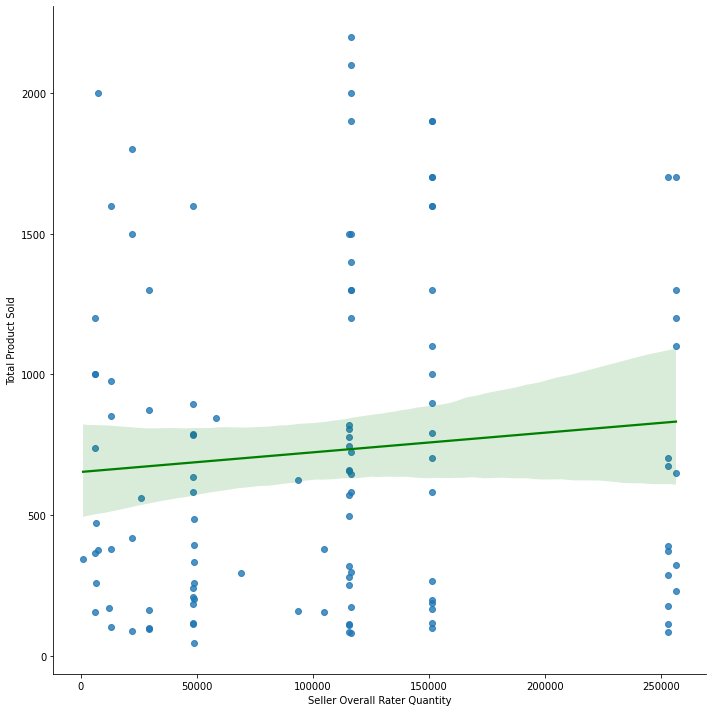

In [118]:
#scatterplot
#Relationship between Seller Overall Rater Quantity and Total Product Sold

sns.lmplot(x='Seller Overall Rater Quantity',y='Total Product Sold',data=df,fit_reg=True, height=10,line_kws={'color': 'green'}) 


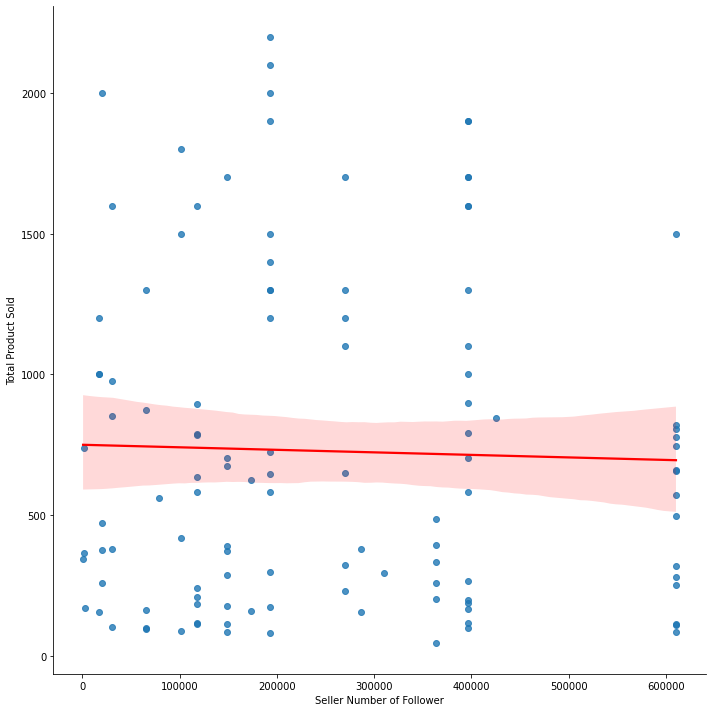

In [120]:
#scatterplot
#Relationship between Seller Number of Follower and Total Product Sold

sns.lmplot(x='Seller Number of Follower',y='Total Product Sold',data=df,fit_reg=True, height=10,line_kws={'color': 'red'}) 


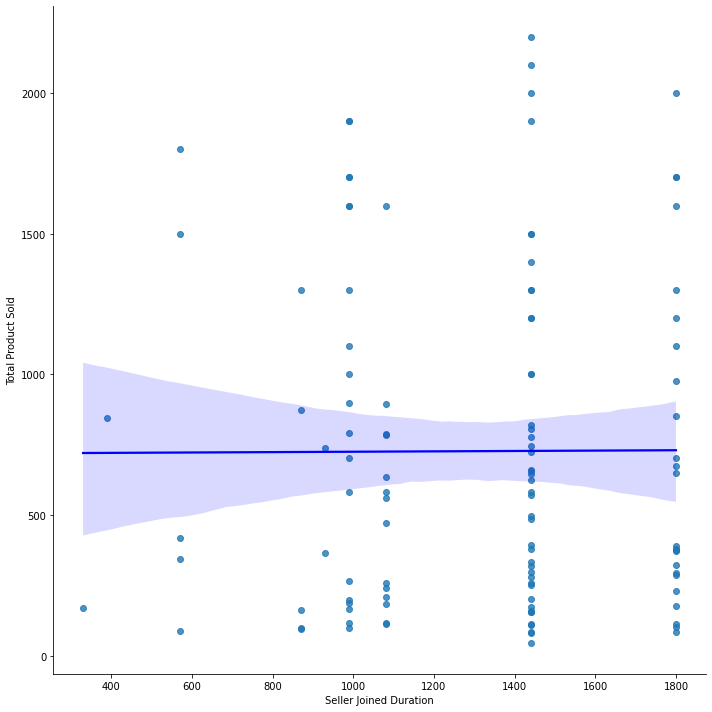

In [122]:
#scatterplot
#Relationship between Seller Joined Duration and Total Product Sold

sns.lmplot(x='Seller Joined Duration',y='Total Product Sold',data=df,fit_reg=True, height=10,line_kws={'color': 'blue'}) 
 

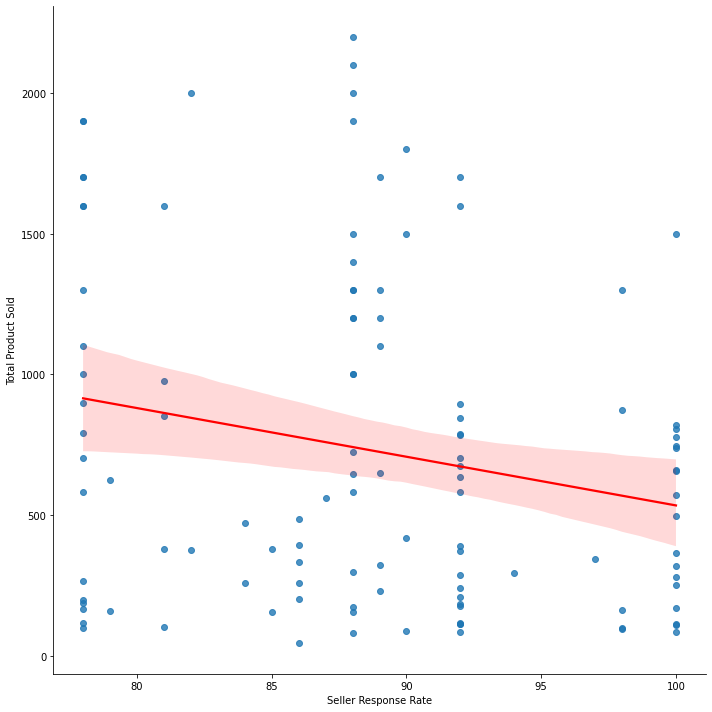

In [124]:
#scatterplot
#Relationship between Seller Response Rate and Total Product Sold

sns.lmplot(x='Seller Response Rate',y='Total Product Sold',data=df,fit_reg=True, height=10,line_kws={'color': 'red'}) 


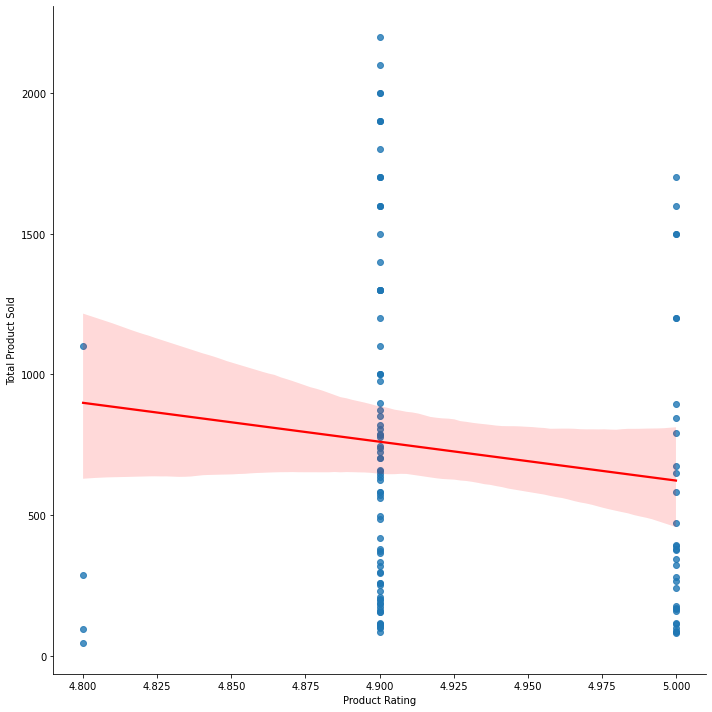

In [126]:
#scatterplot
#Relationship between Product Rating and Total Product Sold

sns.lmplot(x='Product Rating',y='Total Product Sold',data=df,fit_reg=True, height=10,line_kws={'color': 'red'}) 


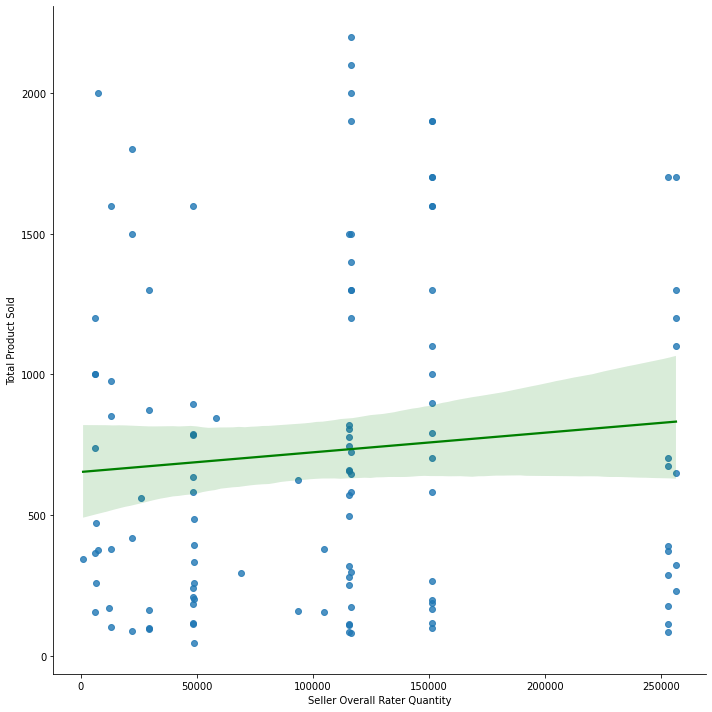

In [128]:
#scatterplot
#Relationship between Seller Overall Rater Quantity and Total Product Sold

sns.lmplot(x='Seller Overall Rater Quantity',y='Total Product Sold',data=df,fit_reg=True, height=10,line_kws={'color': 'green'}) 


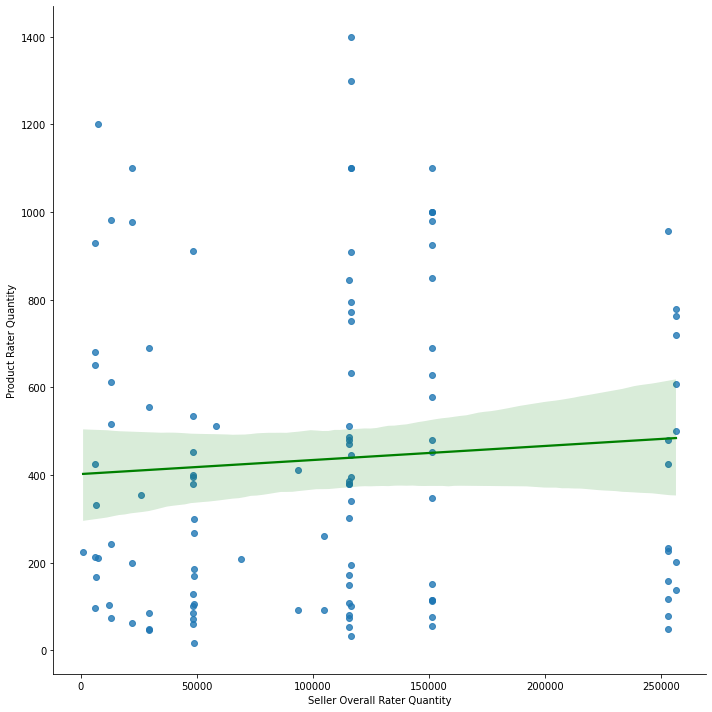

In [113]:
#scatterplot
#Relationship between Seller Overall Rater Quantity and Product Rater Quantity

sns.lmplot(x='Seller Overall Rater Quantity',y='Product Rater Quantity',data=df,fit_reg=True, height=10,line_kws={'color': 'green'}) 


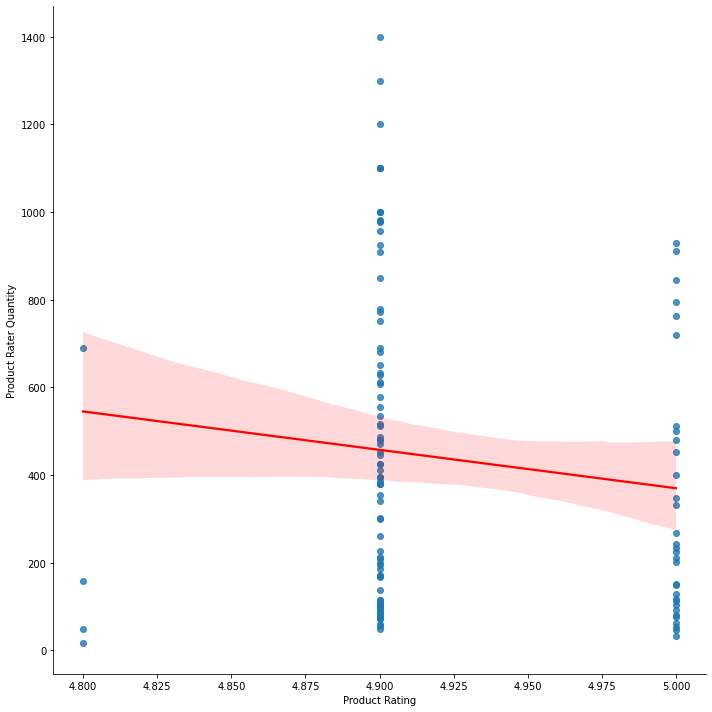

In [115]:
#scatterplot
#Relationship between Product Rating and Product Rater Quantity

sns.lmplot(x='Product Rating',y='Product Rater Quantity',data=df,fit_reg=True, height=10,line_kws={'color': 'red'}) 


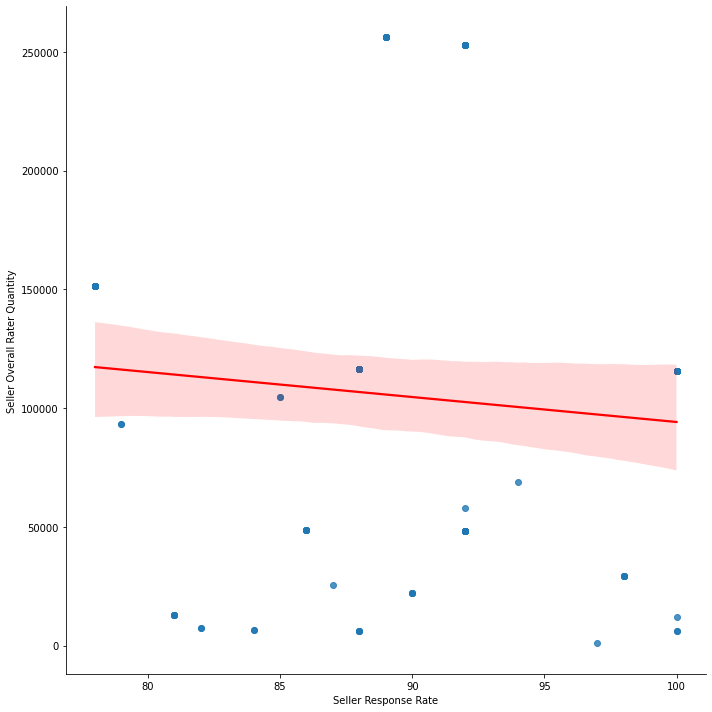

In [116]:
#scatterplot
#Relationship between Seller Response Rate and Seller Overall Rater Quantity

sns.lmplot(x='Seller Response Rate',y='Seller Overall Rater Quantity',data=df,fit_reg=True, height=10,line_kws={'color': 'red'}) 


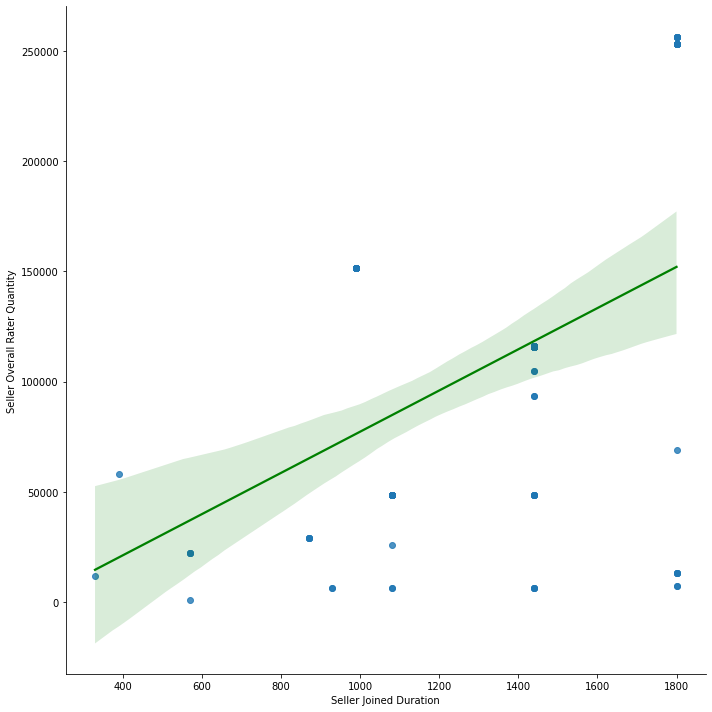

In [117]:
#scatterplot
#Relationship between Seller Joined Duration and Seller Overall Rater Quantity

sns.lmplot(x='Seller Joined Duration',y='Seller Overall Rater Quantity',data=df,fit_reg=True, height=10,line_kws={'color': 'green'}) 


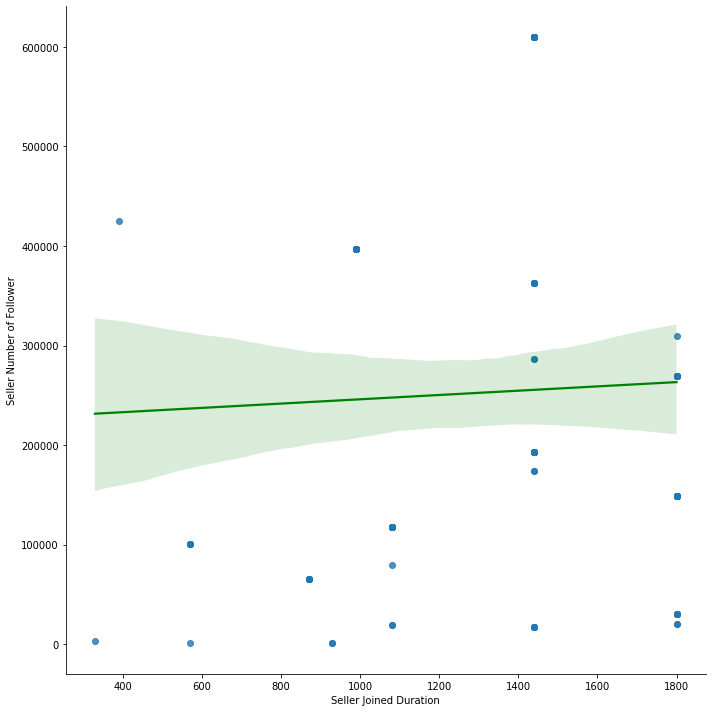

In [119]:
#scatterplot
#Relationship between Seller Joined Duration and Seller Number of Follower

sns.lmplot(x='Seller Joined Duration',y='Seller Number of Follower',data=df,fit_reg=True, height=10,line_kws={'color': 'green'}) 


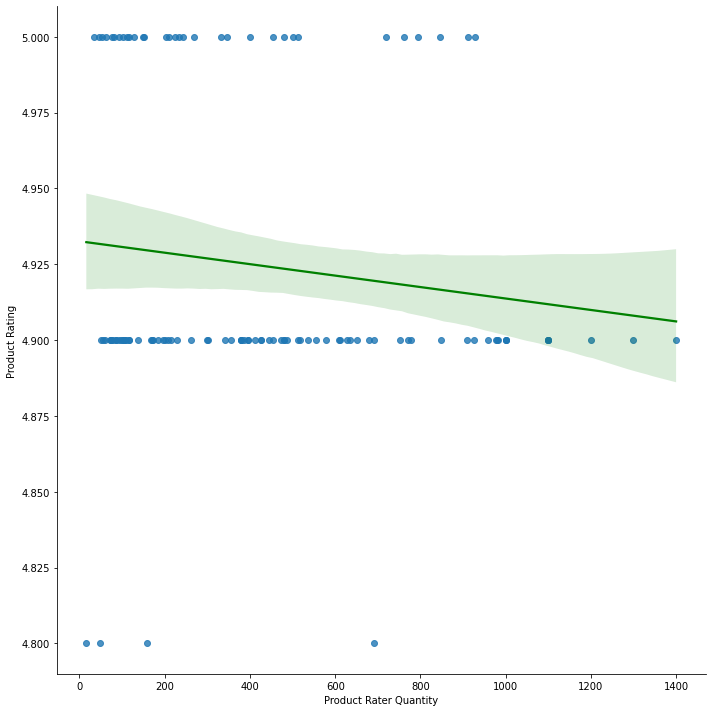

In [26]:
#scatterplot
#Relationship between Product Rater Quantity and Product Rating

sns.lmplot(x='Product Rater Quantity',y='Product Rating',data=df,fit_reg=True, height=10,line_kws={'color': 'green'}) 
